In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
df=pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

In [3]:
df.shape

(215, 15)

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [6]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

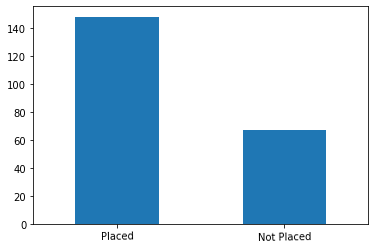

In [7]:
df['status'].value_counts().plot(kind='bar',rot=1)

In [8]:
df['salary']=np.where(df['salary']==np.NaN,0,df['salary'])

In [9]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [10]:
df['status']=np.where(df['status']=="Placed",1,0)

Text(0, 0.5, 'Placed Count')

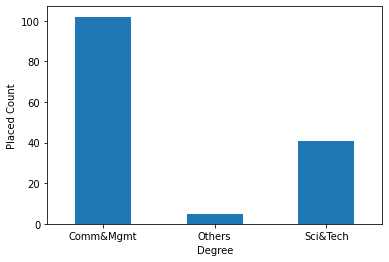

In [11]:
df.groupby(['degree_t'])['status'].sum().plot(kind="bar",rot=0)
plt.xlabel("Degree")
plt.ylabel("Placed Count")

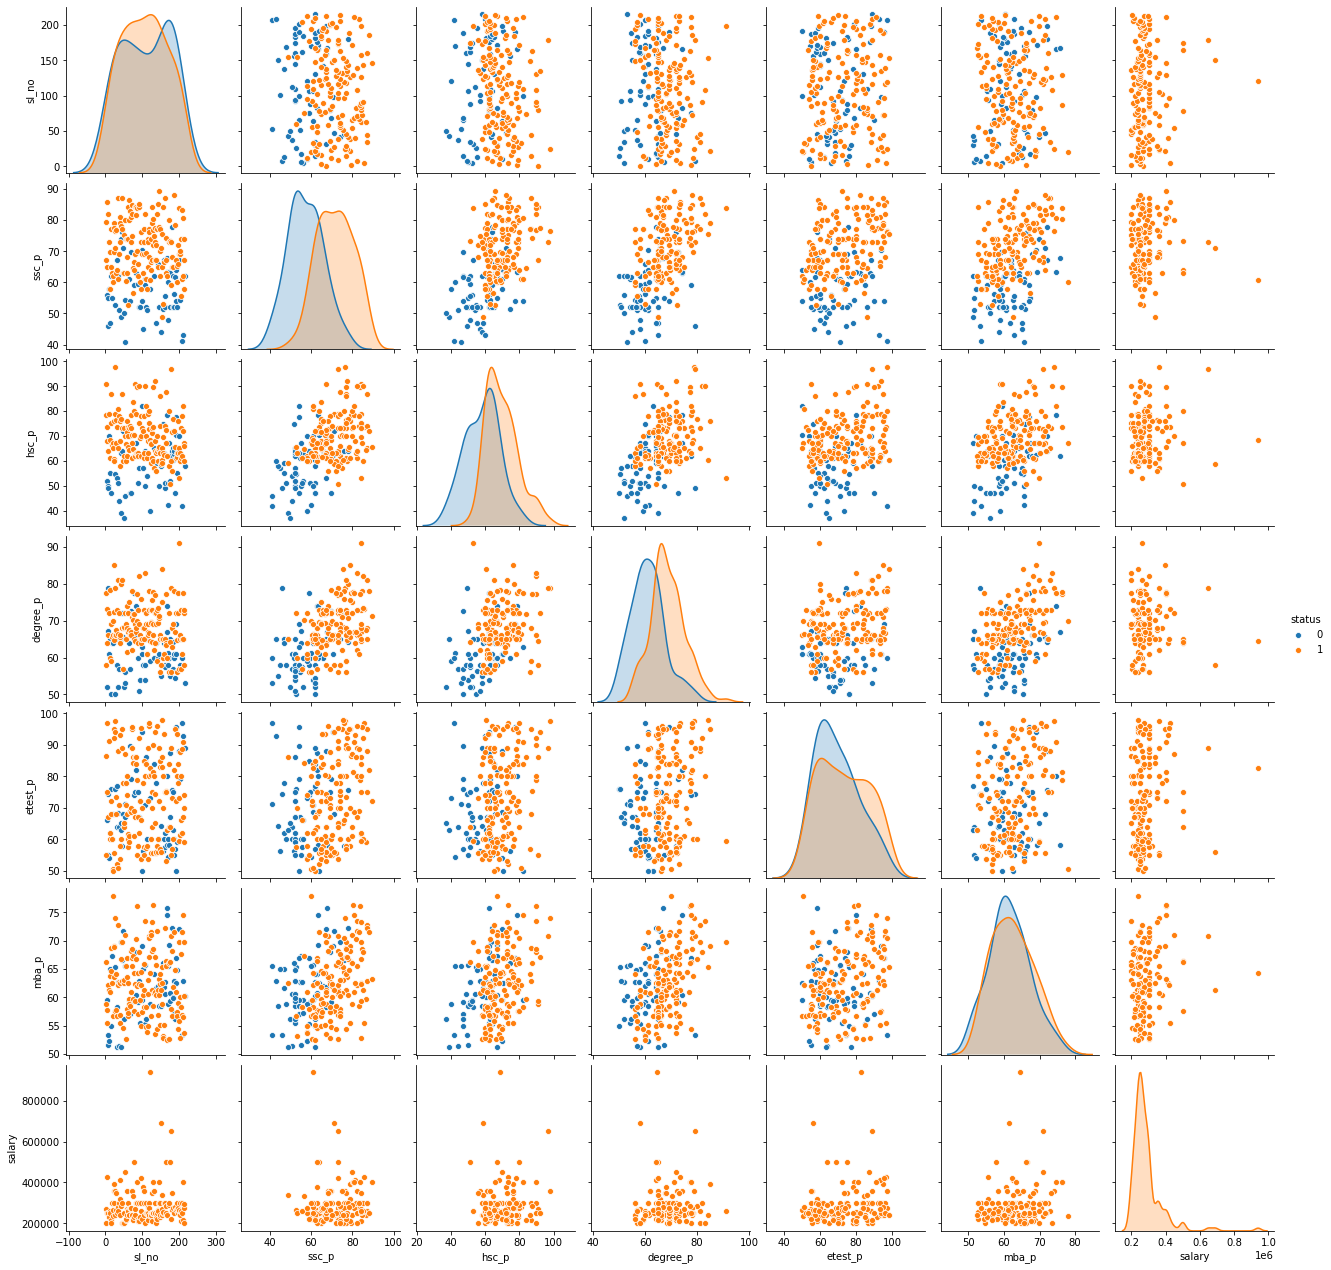

In [12]:
sns.pairplot(df,hue="status")

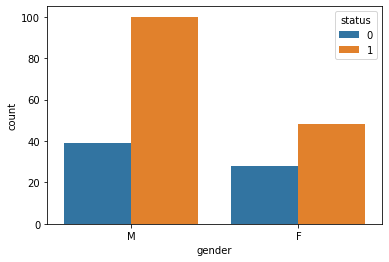

In [13]:
sns.countplot(x=df['gender'],hue=df['status'])

In [14]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [15]:
df['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [16]:
df['ssc_b']=np.where(df['ssc_b']=="Central",1,0)
df['hsc_b']=np.where(df['hsc_b']=="Central",1,0)

In [17]:
dummies=pd.get_dummies(df['hsc_s'])
dummies1=pd.get_dummies(df['specialisation'])

In [18]:
df['workex']=np.where(df['workex']=="Yes",1,0)
df["gender"]=np.where(df['gender']=="M",1,0)

In [19]:
dummies2=pd.get_dummies(df['degree_t'])

In [20]:
df1=pd.concat([df,dummies,dummies1,dummies2],axis=1)

In [21]:
df1.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,status,salary,Arts,Commerce,Science,Mkt&Fin,Mkt&HR,Comm&Mgmt,Others,Sci&Tech
0,1,1,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,0,...,1,270000.0,0,1,0,0,1,0,0,1
1,2,1,79.33,1,78.33,0,Science,77.48,Sci&Tech,1,...,1,200000.0,0,0,1,1,0,0,0,1
2,3,1,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,0,...,1,250000.0,1,0,0,1,0,1,0,0
3,4,1,56.00,1,52.00,1,Science,52.00,Sci&Tech,0,...,0,NaN,0,0,1,0,1,0,0,1
4,5,1,85.80,1,73.60,1,Commerce,73.30,Comm&Mgmt,0,...,1,425000.0,0,1,0,1,0,1,0,0


In [22]:
X=df.drop(['hsc_s','degree_t','specialisation','salary'],axis=1)
y=df['status']

In [23]:
X.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,mba_p,status
0,1,1,67.00,0,91.00,0,58.00,0,55.0,58.80,1
1,2,1,79.33,1,78.33,0,77.48,1,86.5,66.28,1
2,3,1,65.00,1,68.00,1,64.00,0,75.0,57.80,1
3,4,1,56.00,1,52.00,1,52.00,0,66.0,59.43,0
4,5,1,85.80,1,73.60,1,73.30,0,96.8,55.50,1


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [25]:
model1=RandomForestClassifier()

In [26]:
model1.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred1=model1.predict(X_test)

In [28]:
cf1=confusion_matrix(y_test,y_pred1)
cf1

array([[16,  0],
       [ 0, 27]])

In [29]:
print(classification_report(y_test,y_pred1))

NameError: name 'y_pred2' is not defined

In [ ]:
plt.matshow(cf1)
plt.title("Confusion Matrix Plot")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model2=LogisticRegression()

In [ ]:
model2.fit(X_train,y_train)

In [ ]:
y_pred2=model2.predict(X_test)

In [ ]:
cf2=confusion_matrix(y_test,y_pred2)
cf2

In [ ]:
print(classification_report(y_test,y_pred2))

In [ ]:
plt.matshow(cf2)
plt.title("Confusion Matrix Plot")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")